
# Histogram matching

Histogram matching manipulates the pixels of an image so that its histogram matches the histogram of a reference image. If the images have multiple channels, the matching is done independently for each channel, as long as the number of channels is equal in the input image and the reference.

Histogram matching can be used as a lightweight normalisation for image processing, such as feature matching, especially in circumstances where the images have been taken from different sources or in different conditions (i.e. lighting).


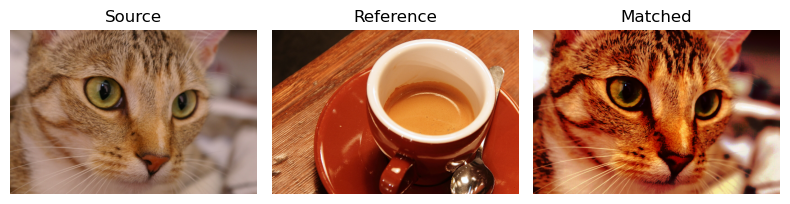

In [1]:
import matplotlib.pyplot as plt

from skimage import data
from skimage import exposure
from skimage.exposure import match_histograms

reference = data.coffee()
image = data.chelsea()

matched = match_histograms(image, reference, channel_axis=-1)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(image)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()

To illustrate the effect of the histogram matching, we plot for each
RGB channel, the histogram and the cumulative histogram. Clearly,
the matched image has the same cumulative histogram as the reference
image for each channel.



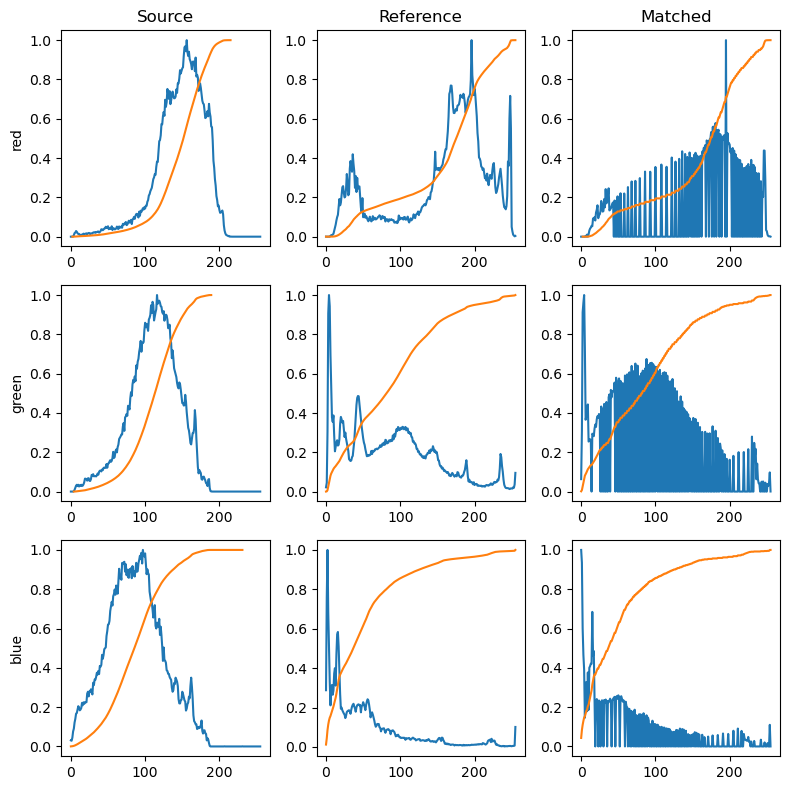

In [2]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))


for i, img in enumerate((image, reference, matched)):
    for c, c_color in enumerate(('red', 'green', 'blue')):
        img_hist, bins = exposure.histogram(img[..., c], source_range='dtype')
        axes[c, i].plot(bins, img_hist / img_hist.max())
        img_cdf, bins = exposure.cumulative_distribution(img[..., c])
        axes[c, i].plot(bins, img_cdf)
        axes[c, 0].set_ylabel(c_color)

axes[0, 0].set_title('Source')
axes[0, 1].set_title('Reference')
axes[0, 2].set_title('Matched')

plt.tight_layout()
plt.show()